In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import string
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [74]:
# Load datasets
supervised_data = pd.read_csv('/content/drive/MyDrive/output.csv')
unsupervised_train = pd.read_json('/content/drive/MyDrive/webis-clickbait-22/train.jsonl', lines=True)
unsupervised_val = pd.read_json('/content/drive/MyDrive/webis-clickbait-22/validation.jsonl', lines=True)

In [75]:
# Separate features and labels
X = supervised_data[' title']
y = supervised_data['label']

In [76]:
# Encode labels
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)

# Split into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Split into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Define the maximum number of words and sequence length
max_words = 5000
max_sequence_length = 100

In [80]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [81]:
# Build and compile the complex RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(GRU(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(SimpleRNN(64, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Explicitly build the model by providing the input shape
model.build(input_shape=(None, max_sequence_length))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now show the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 100, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 100, 128)            │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 100, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 888,513 (3.39 MB)

 Trainable params: 887,873 (3.39 MB)

 Non-trainable params: 640 (2.50 KB)

In [82]:
#model.summary()

In [83]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

In [85]:
# Train the RNN model with validation data
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])

Epoch 1/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 99s 129ms/step - accuracy: 0.8558 - loss: 0.6453 - val_accuracy: 0.9465 - val_loss: 0.3451 - learning_rate: 0.0010
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 95s 132ms/step - accuracy: 0.9830 - loss: 0.1917 - val_accuracy: 0.8664 - val_loss: 0.5620 - learning_rate: 0.0010
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 142s 133ms/step - accuracy: 0.9872 - loss: 0.1053 - val_accuracy: 0.9680 - val_loss: 0.1260 - learning_rate: 0.0010
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 145s 137ms/step - accuracy: 0.9904 - loss: 0.0636 - val_accuracy: 0.9680 - val_loss: 0.1666 - learning_rate: 0.0010
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 97s 135ms/step - accuracy: 0.9940 - loss: 0.0400 - val_accuracy: 0.9680 - val_loss: 0.1236 - learning_rate: 0.0010
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 144s 137ms/step - accuracy: 0.9918 - loss: 0.0467 - val_accuracy: 0.9504 - val_loss: 0.2771 - learning_rate: 0.0010
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 140s 135ms/step - accuracy:

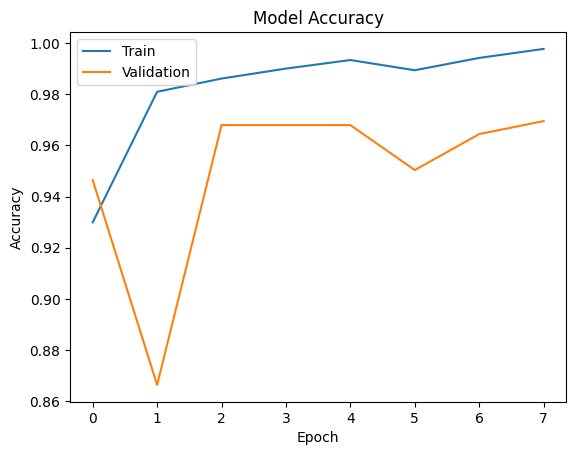

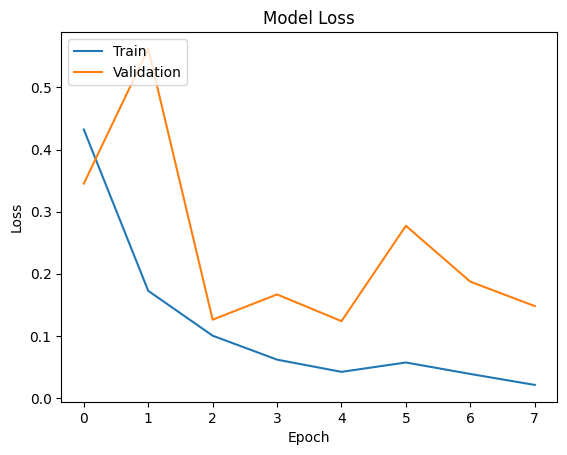

In [86]:
# Plotting accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [87]:

# Evaluate the RNN model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test accuracy: {test_accuracy}")

200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9715 - loss: 0.1271
Test accuracy: 0.9693654179573059


In [88]:
# Predict on the test set
y_test_pred_probs = model.predict(X_test_padded)
y_test_pred = (y_test_pred_probs > 0.5).astype(int).flatten()

200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step


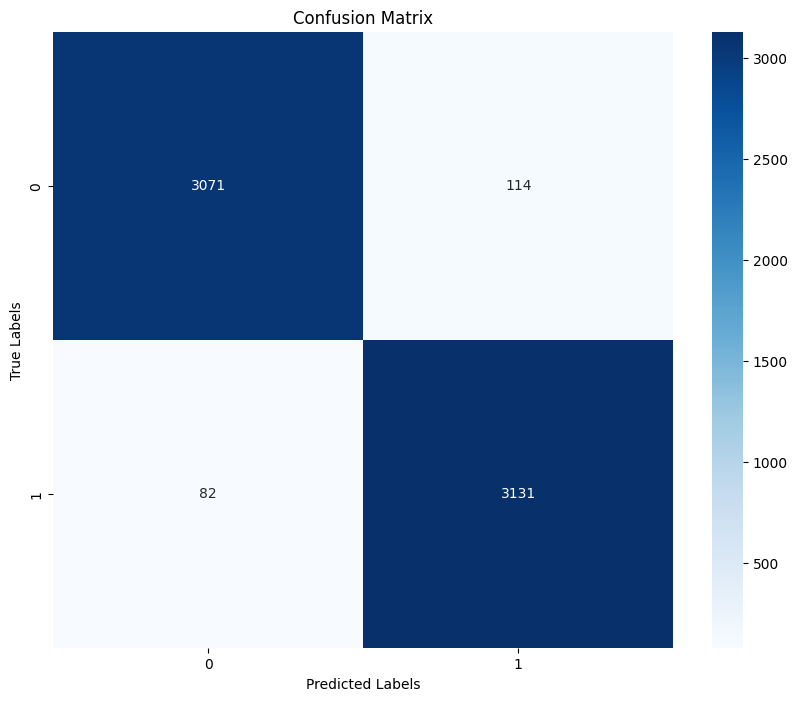

In [89]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [90]:
# Extract relevant text features from the unsupervised datasets
X_unlabeled_train = unsupervised_train['postText'].astype(str)
X_unlabeled_val = unsupervised_val['postText'].astype(str)

In [91]:
# Tokenize and pad the unsupervised data
X_unlabeled_train_seq = tokenizer.texts_to_sequences(X_unlabeled_train)
X_unlabeled_val_seq = tokenizer.texts_to_sequences(X_unlabeled_val)
X_unlabeled_train_padded = pad_sequences(X_unlabeled_train_seq, maxlen=100)
X_unlabeled_val_padded = pad_sequences(X_unlabeled_val_seq, maxlen=100)

In [92]:
# Predict pseudo-labels for the unsupervised training data
pseudo_labels_train_probs = model.predict(X_unlabeled_train_padded)
pseudo_labels_train = (pseudo_labels_train_probs > 0.5).astype(int).flatten()

100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step


In [93]:
# Select high-confidence samples for self-training
confidence_threshold = 0.8
high_confidence_idx_train = pseudo_labels_train_probs.flatten() >= confidence_threshold

In [94]:
# Combine high-confidence pseudo-labeled data with original training data
X_combined_train = np.concatenate([X_train_padded, X_unlabeled_train_padded[high_confidence_idx_train]])
y_combined_train = np.concatenate([y_train, pseudo_labels_train[high_confidence_idx_train]])

In [96]:
# Retrain the model on the combined dataset
history_retraining=model.fit(X_combined_train, y_combined_train, epochs=10, batch_size=32, validation_split=0.1,callbacks=[early_stopping, reduce_lr])

Epoch 1/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 106s 136ms/step - accuracy: 0.9968 - loss: 0.0219 - val_accuracy: 0.9852 - val_loss: 0.0663 - learning_rate: 2.0000e-04
Epoch 2/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 105s 135ms/step - accuracy: 0.9976 - loss: 0.0194 - val_accuracy: 0.9653 - val_loss: 0.1344 - learning_rate: 2.0000e-04
Epoch 3/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 140s 132ms/step - accuracy: 0.9980 - loss: 0.0178 - val_accuracy: 0.9736 - val_loss: 0.1150 - learning_rate: 2.0000e-04
Epoch 4/10
777/777 ━━━━━━━━━━━━━━━━━━━━ 143s 132ms/step - accuracy: 0.9989 - loss: 0.0125 - val_accuracy: 0.9790 - val_loss: 0.0973 - learning_rate: 1.0000e-04


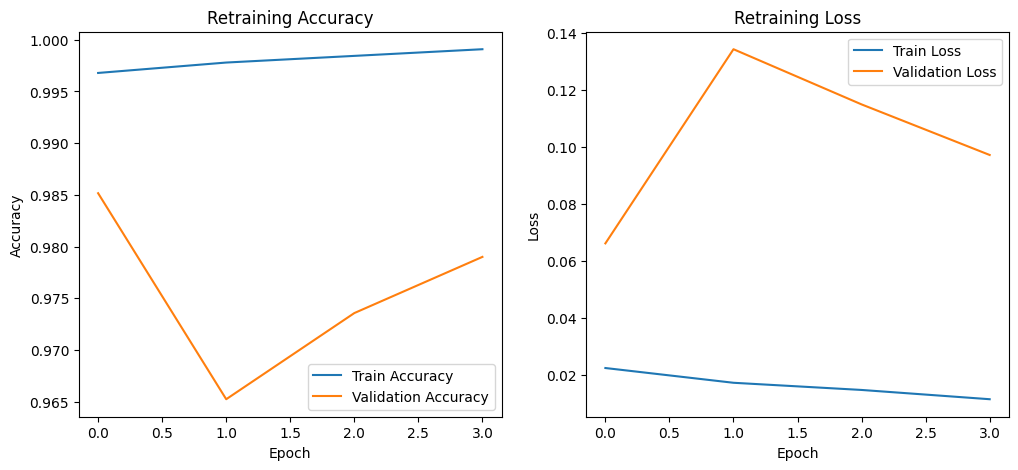

In [97]:
# Plot accuracy and loss for retraining
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_retraining.history['accuracy'], label='Train Accuracy')
plt.plot(history_retraining.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Retraining Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_retraining.history['loss'], label='Train Loss')
plt.plot(history_retraining.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Retraining Loss')
plt.legend()

plt.show()

In [98]:
# Load and preprocess the final test set
test_data = pd.read_csv('/content/drive/MyDrive/clickbait_data.csv')

In [99]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [100]:
test_data['headline'] = test_data['headline'].apply(preprocess_text)
X_test_final = test_data['headline']
y_test_final = test_data['clickbait']
y_test_final = label_encoder.transform(y_test_final)


In [101]:
X_test_final_seq = tokenizer.texts_to_sequences(X_test_final)
X_test_final_padded = pad_sequences(X_test_final_seq, maxlen=100)

In [102]:
# Evaluate the model on the final test set
test_loss_final, test_accuracy_final = model.evaluate(X_test_final_padded, y_test_final)
print(f"Final Test accuracy: {test_accuracy_final}")

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9884 - loss: 0.0645
Final Test accuracy: 0.9882500171661377


In [103]:
# Predict on the final test set
y_test_final_pred_probs = model.predict(X_test_final_padded)
y_test_final_pred = (y_test_final_pred_probs > 0.5).astype(int).flatten()

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step


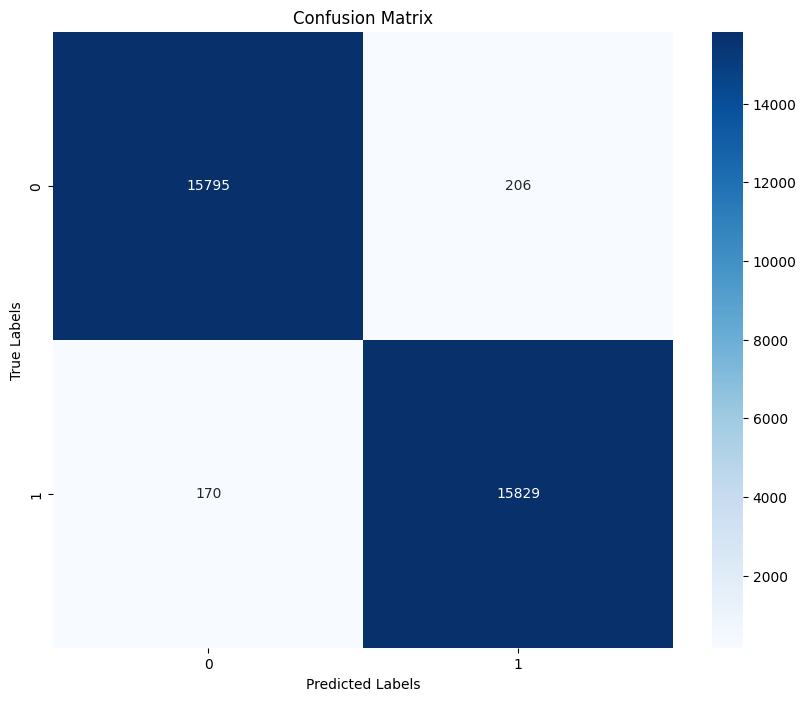

In [104]:
# Compute the confusion matrix for the final test set
conf_matrix_final = confusion_matrix(y_test_final, y_test_final_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()